In [105]:
import pandas as pd
import numpy as np

In [106]:
df=pd.read_csv(r"C:\Users\darap\Downloads\train.csv")

In [107]:
df

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1
...,...,...,...
1273,-7.017043,3.026211,0
1274,5.633331,5.000000,0
1275,-13.501376,-12.774656,0
1276,-13.451631,0.015515,0


In [108]:
df.isnull().sum()

col1      0
col2      0
output    0
dtype: int64

In [109]:
x=df[['col1','col2']]

In [110]:
y=df.output

# standardizing the data


In [111]:
from sklearn.preprocessing import StandardScaler

rescale = StandardScaler()

std_data_x = rescale.fit_transform(x)

In [112]:
std_data_x

array([[-0.52581916,  1.57590933],
       [-0.54705013,  1.73808025],
       [-0.77837883,  1.59890653],
       ...,
       [-0.1622176 , -0.28795849],
       [-0.16149018, -0.09841961],
       [ 0.30769765, -0.19617885]])

In [121]:
from pickle import dump

In [134]:
dump(std_data_x,open(r"C:\Users\darap\Desktop\pickle/std_scaler.pkl",'wb'))

# train_test _split

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(std_data_x, y,train_size = 0.80, random_state = 0)

In [114]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# svm linear

In [115]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)

In [116]:
from sklearn.metrics import accuracy_score
acc_linear=accuracy_score(y_test,y_pred)
acc_linear

0.61328125

# svm rbf

In [117]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)

In [118]:
from sklearn.metrics import accuracy_score
acc_rbf=accuracy_score(y_test,y_pred)
acc_rbf

1.0

# logistic Regression

In [119]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [120]:
from sklearn.metrics import accuracy_score
acc_log=accuracy_score(y_test,y_pred)
acc_log

0.61328125

In [135]:
dump(svclassifier,open(r"C:\Users\darap\Desktop\pickle/ classifier.pkl",'wb'))

In [127]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

<AxesSubplot:ylabel='Density'>

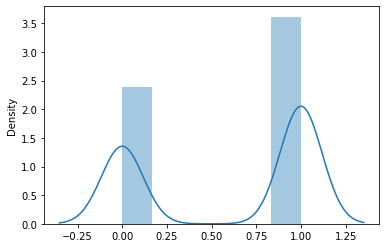

In [129]:
sns.distplot(x=df['output'])

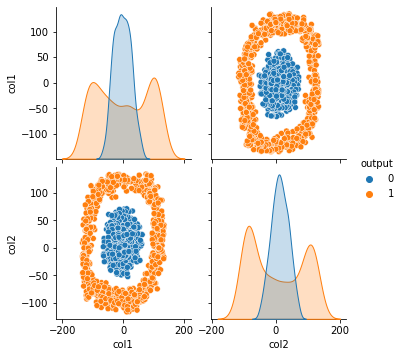

In [130]:
sns.pairplot(df,hue='output')

# The accuracy scors of svm rbf is more, so we choose to train the data with svm rbf kernel